In [ ]:
#|default_exp app

In [1]:
#|export
from fastai.vision.all import *
import gradio as gr

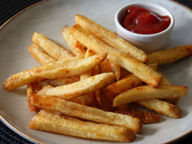

In [3]:
im = PILImage.create('fries.jpg')
im.thumbnail((192,192))
im

In [4]:
#|export
learn = load_learner('export.pkl')

In [7]:
learn.predict(im)

('fries', TensorBase(0), TensorBase([0.9952, 0.0022, 0.0026]))

In [14]:
learn.dls.vocab

['fries', 'hamburger', 'milkshake']

In [19]:
#|export
categories = ('Fries','Hamburger', 'Milk shake')

def classify_image(img):
    pred, idx, prob = learn.predict(img)
    return dict(zip(categories, map(float,prob)))

In [20]:
classify_image(im)

{'Fries': 0.9952397346496582,
 'Hamburger': 0.0021943373139947653,
 'Milk shake': 0.0025659294333308935}

In [22]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['hamburger.jpg','fries.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [4]:
import nbdev
nbdev.export.nb_export('app.ipynb')

/home/edwin/miniconda3/lib/python3.10/site-packages/nbdev/export.py:54: UserWarning: Notebook 'app.ipynb' uses `#|export` without `#|default_exp` cell.
Note nbdev2 no longer supports nbdev1 syntax. Run `nbdev_migrate` to upgrade.
See https://nbdev.fast.ai/getting_started.html for more information.
  warn(f"Notebook '{nbname}' uses `#|export` without `#|default_exp` cell.\n"
